# MODEL 1: **LOGISTIC REGRESSION**

# Importing Libraries

In [3]:
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # To split data into training and validation sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding categorical variables and scaling numerical features
from sklearn.linear_model import LogisticRegression  # For training the Logistic Regression model
from sklearn.metrics import f1_score  # For evaluating model performance using F1 score


print("Libraries imported successfully.")

Libraries imported successfully.


# Loading the Dataset

In [4]:
# Load the training dataset
df = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")

# Display the first 5 rows to verify loading
print("Initial Dataset:")
print(df.head())

# Check the shape of the dataset
print(f"\nDataset Shape: {df.shape}")


Initial Dataset:
  last contact date  age           job  marital  education default  balance  \
0        2009-04-17   26   blue-collar  married  secondary      no      647   
1        2009-10-11   52    technician  married  secondary      no      553   
2        2010-11-20   44   blue-collar  married  secondary      no     1397   
3        2009-09-01   33        admin.  married  secondary      no      394   
4        2008-01-29   31  entrepreneur   single   tertiary      no      137   

  housing loan    contact  duration  campaign  pdays  previous poutcome target  
0     yes   no   cellular       357         2    331         1    other     no  
1     yes   no  telephone       160         1     -1         0      NaN     no  
2      no   no   cellular       326         1     -1         0      NaN     no  
3     yes   no  telephone       104         3     -1         0      NaN     no  
4      no   no   cellular       445         2     -1         0      NaN     no  

Dataset Shape: (39211

# Checking Missing Values

In [5]:
# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64


# Handling Missing Values

In [6]:
# Fill missing numerical values with the median
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with the mode
cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("\nAfter Handling Missing Values:")
print(df.isnull().sum())



After Handling Missing Values:
last contact date    0
age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing              0
loan                 0
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
target               0
dtype: int64


# Feature Engineering

In [7]:
# Extract 'year', 'month', and 'day_of_week' from 'last contact date'
df['year'] = pd.to_datetime(df['last contact date']).dt.year
df['month'] = pd.to_datetime(df['last contact date']).dt.month
df['day_of_week'] = pd.to_datetime(df['last contact date']).dt.dayofweek

# Drop 'last contact date' as it's no longer needed
df = df.drop('last contact date', axis=1)

print("\nAfter Feature Engineering (Extracting 'year', 'month', and 'day_of_week'):")
print(df.head())

# Check the shape after dropping the column
print(f"\nDataset Shape After Dropping 'last contact date': {df.shape}")



After Feature Engineering (Extracting 'year', 'month', and 'day_of_week'):
   age           job  marital  education default  balance housing loan  \
0   26   blue-collar  married  secondary      no      647     yes   no   
1   52    technician  married  secondary      no      553     yes   no   
2   44   blue-collar  married  secondary      no     1397      no   no   
3   33        admin.  married  secondary      no      394     yes   no   
4   31  entrepreneur   single   tertiary      no      137      no   no   

     contact  duration  campaign  pdays  previous poutcome target  year  \
0   cellular       357         2    331         1    other     no  2009   
1  telephone       160         1     -1         0  failure     no  2009   
2   cellular       326         1     -1         0  failure     no  2010   
3  telephone       104         3     -1         0  failure     no  2009   
4   cellular       445         2     -1         0  failure     no  2008   

   month  day_of_week  
0   

# Separating Features (X) and Target (y)

In [8]:
# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

print("\nFeatures (X):")
print(X.head())
print(f"\nTarget (y):\n{y.head()}")



Features (X):
   age           job  marital  education default  balance housing loan  \
0   26   blue-collar  married  secondary      no      647     yes   no   
1   52    technician  married  secondary      no      553     yes   no   
2   44   blue-collar  married  secondary      no     1397      no   no   
3   33        admin.  married  secondary      no      394     yes   no   
4   31  entrepreneur   single   tertiary      no      137      no   no   

     contact  duration  campaign  pdays  previous poutcome  year  month  \
0   cellular       357         2    331         1    other  2009      4   
1  telephone       160         1     -1         0  failure  2009     10   
2   cellular       326         1     -1         0  failure  2010     11   
3  telephone       104         3     -1         0  failure  2009      9   
4   cellular       445         2     -1         0  failure  2008      1   

   day_of_week  
0            4  
1            6  
2            5  
3            1  
4   

# Encoding Categorical Variables

In [9]:
# Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Encode the target variable
label_encoder_target = LabelEncoder()
y = label_encoder_target.fit_transform(y)

print("\nAfter Encoding Categorical Variables:")
print(X.head())
print(f"\nEncoded Target (y):\n{y[:5]}")



After Encoding Categorical Variables:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   26    1        1          1        0      647        1     0        0   
1   52    9        1          1        0      553        1     0        1   
2   44    1        1          1        0     1397        0     0        0   
3   33    0        1          1        0      394        1     0        1   
4   31    2        2          2        0      137        0     0        0   

   duration  campaign  pdays  previous  poutcome  year  month  day_of_week  
0       357         2    331         1         1  2009      4            4  
1       160         1     -1         0         0  2009     10            6  
2       326         1     -1         0         0  2010     11            5  
3       104         3     -1         0         0  2009      9            1  
4       445         2     -1         0         0  2008      1            1  

Encoded Target (y):
[0 0 0 0 0]


# Standardizing Numerical Features

In [10]:
# Standardize numerical features
scaler = StandardScaler()
X[X.select_dtypes(include=["int64", "float64"]).columns] = scaler.fit_transform(X.select_dtypes(include=["int64", "float64"]))

print("\nAfter Standardizing Numerical Features:")
print(X.head())



After Standardizing Numerical Features:
        age       job   marital  education   default   balance   housing  \
0 -1.268393 -1.047076 -0.241726  -0.193522 -0.247135 -0.292989  0.900303   
1  0.777371  1.413575 -0.241726  -0.193522 -0.247135 -0.298732  0.900303   
2  0.147905 -1.047076 -0.241726  -0.193522 -0.247135 -0.247159 -1.110737   
3 -0.717610 -1.354657 -0.241726  -0.193522 -0.247135 -0.308448  0.900303   
4 -0.874977 -0.739494  1.343278   1.303161 -0.247135 -0.324152 -1.110737   

       loan   contact  duration  campaign     pdays  previous  poutcome  year  \
0 -0.481949 -0.329728 -0.106702 -0.314334  1.607699 -0.245271  1.600336  2009   
1 -0.481949  3.032807 -0.362850 -0.415446 -0.455175 -0.267926 -0.351537  2009   
2 -0.481949 -0.329728 -0.147009 -0.415446 -0.455175 -0.267926 -0.351537  2010   
3 -0.481949  3.032807 -0.435663 -0.213222 -0.455175 -0.267926 -0.351537  2009   
4 -0.481949 -0.329728  0.007720 -0.314334 -0.455175 -0.267926 -0.351537  2008   

   month  day_o

# Splitting the Data

In [11]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Set Shape (X_train, y_train):", X_train.shape, len(y_train))
print("Validation Set Shape (X_val, y_val):", X_val.shape, len(y_val))



Training Set Shape (X_train, y_train): (31368, 17) 31368
Validation Set Shape (X_val, y_val): (7843, 17) 7843


# Training the Logistic Regression Model

In [18]:
# Initialize the model
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)
train_columns = X_train.columns


print("\nLogistic Regression Model Trained Successfully.")



Logistic Regression Model Trained Successfully.


# Evaluating the Model

In [19]:
# Predict on validation data
y_val_pred = log_reg.predict(X_val)

# Calculate F1 Score
f1 = f1_score(y_val, y_val_pred, average='macro')

print(f"\nValidation F1 Score: {f1:.4f}")



Validation F1 Score: 0.7125


# Handling Missing Values in Test Data

In [20]:
# Load test dataset
X_test = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

# Feature engineering on test data
X_test['month'] = pd.to_datetime(X_test['last contact date']).dt.month
X_test['day_of_week'] = pd.to_datetime(X_test['last contact date']).dt.dayofweek
X_test['year'] = pd.to_datetime(X_test['last contact date']).dt.year  # Extract year
X_test = X_test.drop('last contact date', axis=1)

# Handle missing values in categorical columns (fill with mode)
cat_cols = X_test.select_dtypes(include=["object"]).columns
for column in cat_cols:
    X_test[column] = X_test[column].fillna(X_test[column].mode()[0])

# Encode categorical variables using the same LabelEncoders as training
for column in cat_cols:
    X_test[column] = label_encoders[column].transform(X_test[column])

# Standardize numerical features using the same scaler as training
num_cols = X_test.select_dtypes(include=["int64", "float64"]).columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("\nProcessed Test Data:")
print(X_test.head())



Processed Test Data:
        age       job   marital  education   default   balance   housing  \
0 -0.481561 -0.124332  1.343278   1.303161 -0.247135 -0.332096 -1.110737   
1 -0.953660  1.721157 -0.241726   1.303161 -0.247135 -0.267324 -1.110737   
2 -0.796294 -1.047076  1.343278  -0.193522 -0.247135 -0.327513  0.900303   
3 -0.324194 -1.354657 -0.241726  -1.690205 -0.247135 -0.241660 -1.110737   
4  1.328153 -0.124332 -0.241726   1.303161 -0.247135 -0.313276 -1.110737   

       loan   contact  duration  campaign     pdays  previous  poutcome  \
0 -0.481949 -0.329728 -0.544884 -0.415446 -0.455175 -0.267926 -0.351537   
1 -0.481949 -0.329728 -0.469470 -0.314334 -0.455175 -0.267926 -0.351537   
2 -0.481949 -0.329728 -0.459068 -0.112110 -0.455175 -0.267926 -0.351537   
3 -0.481949 -0.329728 -0.139208 -0.314334 -0.455175 -0.267926 -0.351537   
4 -0.481949 -0.329728  0.197555 -0.415446  0.644610 -0.222615 -0.351537   

   month  day_of_week  year  
0     11            5  2009  
1      2  

# Predicting and Saving the Submission

In [24]:
# Ensure test data has the same columns in the same order as the training data
X_test = X_test[train_columns]  # Reorder X_test to match the column order of X_train

# Predict on test data
y_test_pred = log_reg.predict(X_test)

# Inverse transform predictions to original labels
y_test_pred = label_encoder_target.inverse_transform(y_test_pred)

print("\nPredicted Labels for Test Data:")
print(y_test_pred)


# Create the submission file
submission = pd.DataFrame({"id": range(0, X_test.shape[0]), "target": y_test_pred})

# Save the submission file
submission.to_csv("submission.csv", index=False)

print("Submission file created: submission.csv")



Predicted Labels for Test Data:
['no' 'no' 'no' ... 'no' 'yes' 'no']
Submission file created: submission.csv


# MODEL 2: **Support Vector Machine (SVM)**

# Import Libraries and Initialize the Model

In [25]:
# Import necessary libraries
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning (grid search)
from sklearn.metrics import f1_score  # To evaluate the model's performance

# Initialize the model
svm = SVC(random_state=42)

# Output the model initialization
print("SVM Model Initialized.")


SVM Model Initialized.


# Define Hyperparameter Grid

In [26]:
# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf'
}

# Output the hyperparameter grid
print("Hyperparameter Grid Defined:")
print(param_grid)


Hyperparameter Grid Defined:
{'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}


# Grid Search for Hyperparameter Tuning

In [27]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)

# Train the model using grid search
grid_search.fit(X_train, y_train)

# Output the best hyperparameters after grid search
print(f"Best Hyperparameters: {grid_search.best_params_}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


# Evaluate the Model with F1 Score on Validation Set

In [28]:
# Get the best model from grid search
best_svm_model = grid_search.best_estimator_

# Predict on the validation data using the best model
y_val_pred_svm = best_svm_model.predict(X_val)

# Calculate F1 score on the validation set
f1_svm = f1_score(y_val, y_val_pred_svm, average='macro')

# Output the F1 Score
print(f"Validation F1 Score: {f1_svm:.4f}")


Validation F1 Score: 0.6738


# Predict on the Test Set and Prepare Submission

In [29]:
# Predict on the test set using the best model
y_test_pred_svm = best_svm_model.predict(X_test)

# Inverse transform the predicted target variable
y_test_pred_svm = label_encoder_target.inverse_transform(y_test_pred_svm)

# Create the submission file
submission_svm = pd.DataFrame({"id": range(0, X_test.shape[0]), "target": y_test_pred_svm})

# Save the submission file
submission_svm.to_csv("submission_svm.csv", index=False)

# Output the submission creation
print("SVM Submission file created: submission_svm.csv")


SVM Submission file created: submission_svm.csv


# MODEL 3: **Ensemble Model (Random Forest)**

# Import Libraries and Initialize the Model (Random Forest)

In [30]:
# Import necessary libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier  # For Random Forest Model
from sklearn.metrics import f1_score  # To evaluate the model's performance

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Output the model initialization
print("Random Forest Model Initialized.")


Random Forest Model Initialized.


# Define Hyperparameter Grid for Random Forest

In [31]:
# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 20, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Output the hyperparameter grid
print("Hyperparameter Grid for Random Forest Defined:")
print(param_grid_rf)


Hyperparameter Grid for Random Forest Defined:
{'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


# Grid Search for Hyperparameter Tuning (Random Forest)

In [32]:
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning (grid search)

# Perform grid search with cross-validation for Random Forest
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)

# Train the Random Forest model using grid search
grid_search_rf.fit(X_train, y_train)

# Output the best hyperparameters after grid search
print(f"Best Hyperparameters for Random Forest: {grid_search_rf.best_params_}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  15.9s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  17.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  18.1s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  15.1s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=  23.6s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=  22.3s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=  13.7s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=  19.3s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=  14.7s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=  13.5s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=  25.4s
[CV] END ...................C=10, gamma=scale

# Evaluate the Random Forest Model with F1 Score on Validation Set

In [33]:
# Get the best model from grid search
best_rf_model = grid_search_rf.best_estimator_

# Predict on the validation data using the best model
y_val_pred_rf = best_rf_model.predict(X_val)

# Calculate F1 score on the validation set
f1_rf = f1_score(y_val, y_val_pred_rf, average='macro')

# Output the F1 Score
print(f"Validation F1 Score for Random Forest: {f1_rf:.4f}")


Validation F1 Score for Random Forest: 0.7131


# Predict on the Test Set and Prepare Submission

In [34]:
# Predict on the test set using the best model
y_test_pred_rf = best_rf_model.predict(X_test)

# Inverse transform the predicted target variable
y_test_pred_rf = label_encoder_target.inverse_transform(y_test_pred_rf)

# Create the submission file
submission_rf = pd.DataFrame({"id": range(0, X_test.shape[0]), "target": y_test_pred_rf})

# Save the submission file
submission_rf.to_csv("submission_rf.csv", index=False)

# Output the submission creation
print("Random Forest Submission file created: submission_rf.csv")


Random Forest Submission file created: submission_rf.csv


# COMPARISON OF 3 MODELS

# Importing the necessary libraries and metrics calculation

In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_score

# Assuming y_test and y_pred_* are already defined
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log_reg),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_rf)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_log_reg, average='macro'),
        f1_score(y_test, y_pred_svm, average='macro'),
        f1_score(y_test, y_pred_rf, average='macro')
    ],
    'Precision': [
        precision_score(y_test, y_pred_log_reg, average='macro', zero_division=0),  # Set zero_division to 0
        precision_score(y_test, y_pred_svm, average='macro', zero_division=0),
        precision_score(y_test, y_pred_rf, average='macro', zero_division=0)
    ]
})

print(metrics_df)


                 Model  Accuracy  F1 Score  Precision
0  Logistic Regression  0.857708  0.624869   0.731364
1                  SVM  0.847252  0.458655   0.423626
2        Random Forest  0.866633  0.708454   0.744460


# Setting up and plotting the figure and axes for the bar charts

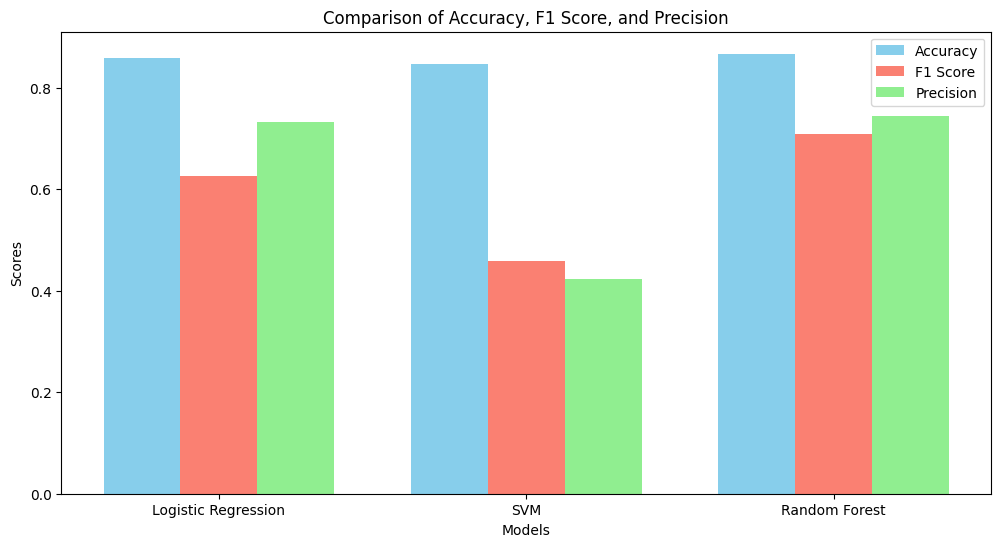

In [59]:
# Set up the figure and axes for the bar charts
fig, ax = plt.subplots(figsize=(12, 6))

# Define the x-axis positions for the bars
x = np.arange(len(metrics_df['Model']))

# Width of the bars
width = 0.25  # Adjusted width to fit three bars

# Plot Accuracy, F1 Score, and Precision as grouped bars
ax.bar(x - width, metrics_df['Accuracy'], width, label='Accuracy', color='skyblue')
ax.bar(x, metrics_df['F1 Score'], width, label='F1 Score', color='salmon')
ax.bar(x + width, metrics_df['Precision'], width, label='Precision', color='lightgreen')

# Add labels, title, and custom x-ticks
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Accuracy, F1 Score, and Precision')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df['Model'])
ax.legend()



# FINAL MODEL

# Import Libraries

In [60]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

print("Libraries imported successfully.")

Libraries imported successfully.


# Loading the Dataset

In [61]:
# Load the training dataset
df = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")

# Display the first 5 rows to verify loading
print("Initial Dataset:")
print(df.head())

# Check the shape of the dataset
print(f"\nDataset Shape: {df.shape}")

Initial Dataset:
  last contact date  age           job  marital  education default  balance  \
0        2009-04-17   26   blue-collar  married  secondary      no      647   
1        2009-10-11   52    technician  married  secondary      no      553   
2        2010-11-20   44   blue-collar  married  secondary      no     1397   
3        2009-09-01   33        admin.  married  secondary      no      394   
4        2008-01-29   31  entrepreneur   single   tertiary      no      137   

  housing loan    contact  duration  campaign  pdays  previous poutcome target  
0     yes   no   cellular       357         2    331         1    other     no  
1     yes   no  telephone       160         1     -1         0      NaN     no  
2      no   no   cellular       326         1     -1         0      NaN     no  
3     yes   no  telephone       104         3     -1         0      NaN     no  
4      no   no   cellular       445         2     -1         0      NaN     no  

Dataset Shape: (39211

# Basic Statistics

In [62]:
print("Basic Statistics:\n", df.describe())

Basic Statistics:
                 age        balance      duration      campaign         pdays  \
count  39211.000000   39211.000000  39211.000000  39211.000000  39211.000000   
mean      42.120247    5441.781719    439.062789      5.108770     72.256051   
std       12.709352   16365.292065    769.096291      9.890153    160.942593   
min       18.000000   -8019.000000      0.000000      1.000000     -1.000000   
25%       33.000000      98.000000    109.000000      1.000000     -1.000000   
50%       40.000000     549.000000    197.000000      2.000000     -1.000000   
75%       50.000000    2030.000000    380.000000      4.000000     -1.000000   
max       95.000000  102127.000000   4918.000000     63.000000    871.000000   

           previous  
count  39211.000000  
mean      11.826171  
std       44.140259  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000  


# Correlation Heatmap

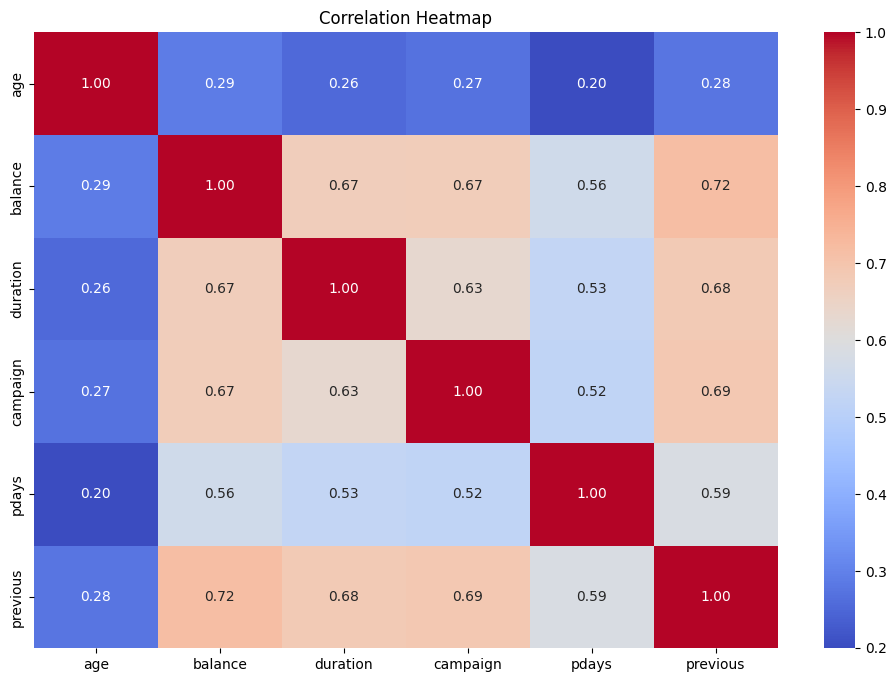

In [63]:
# Visualize correlations using a heatmap
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


**Purpose:** The correlation heatmap shows the relationships between the numeric features in the dataset.


**Observation:** Strong correlations between certain features (e.g., duration and campaign), which suggests that the duration of the call may be related to the number of calls made during the campaign. It’s also important to check for any strong negative correlations, which could suggest inverse relationships between features.

# Age Distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


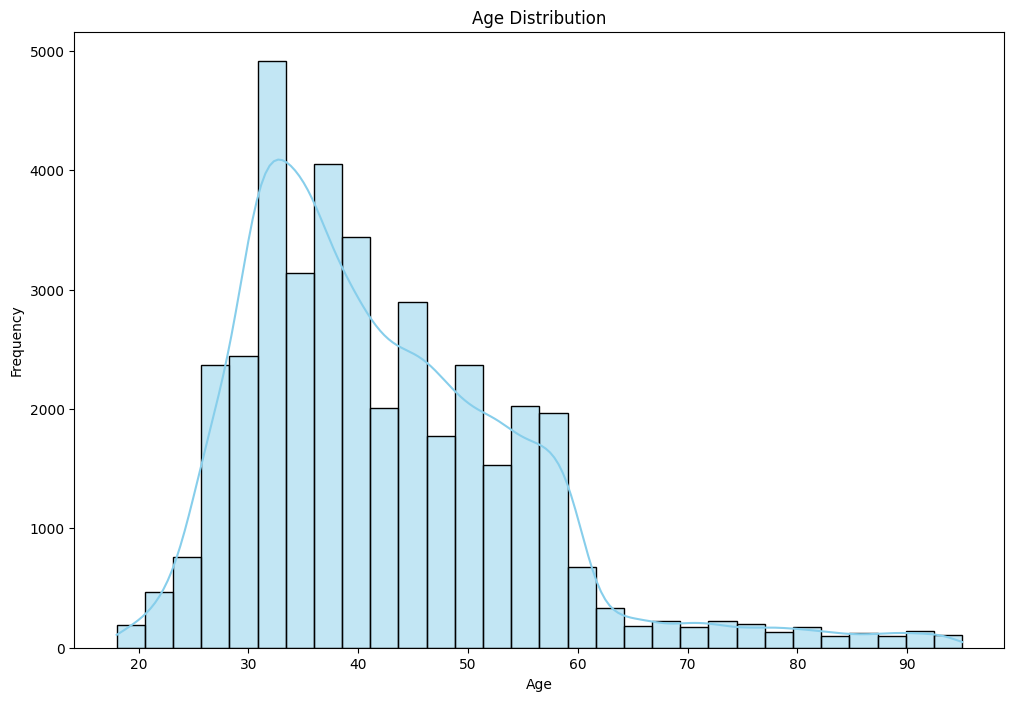

In [64]:
# Visualize the distribution of age
plt.figure(figsize=(12, 8))
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Purpose:** The age distribution plot shows how the ages of individuals in the dataset are spread out.

**Observation:** Most of the customers are in the middle age range, likely between 30 to 60 years. The distribution appears somewhat skewed, possibly with a few outliers or higher concentrations in specific age brackets.

# Age vs Duration Scatter Plot

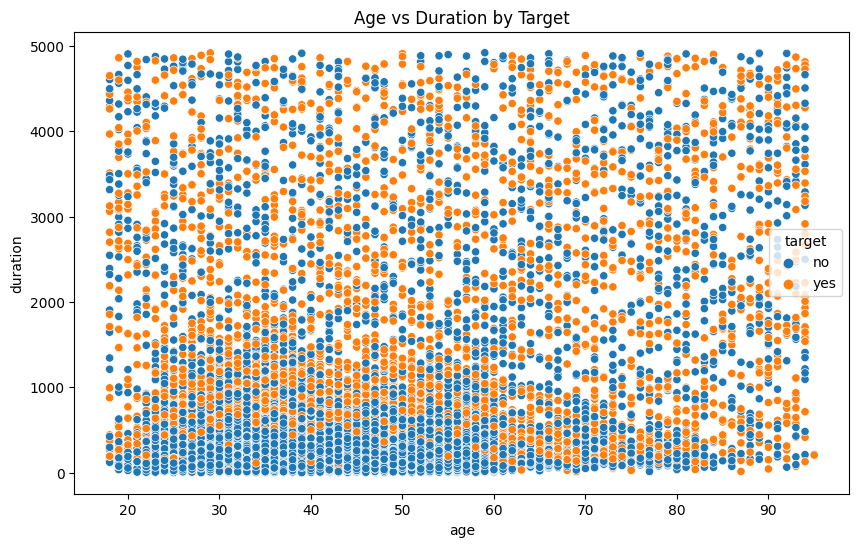

In [65]:
# Scatter plot to visualize relationship between age and duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='duration', data=df, hue='target')
plt.title('Age vs Duration by Target')
plt.show()


**Purpose:** This scatter plot helps visualize the relationship between a person's age and the duration of the call.

**Observation:** From the plot, you can analyze if older or younger customers tend to have longer calls and whether the target (success of the telemarketing campaign) is influenced by the duration. If most of the positive target values (subscribed) are associated with longer call durations, this could be a key feature in predicting success.

# Job Distribution

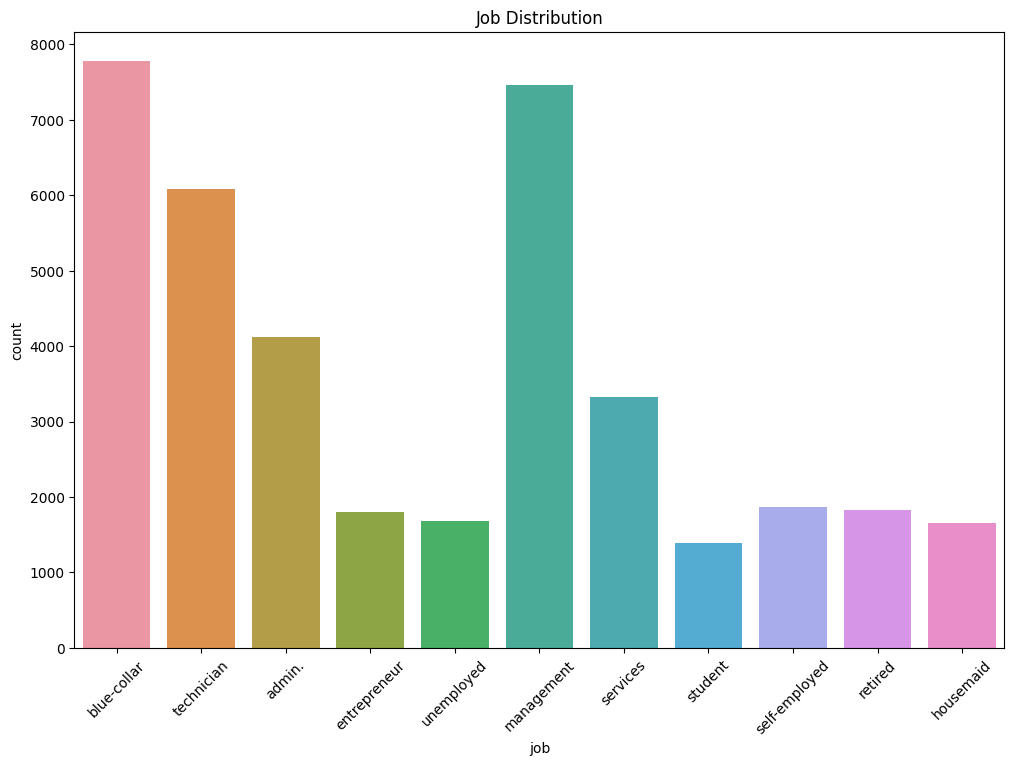

In [66]:
# Visualize distributions of categorical features (e.g., job distribution)
plt.figure(figsize=(12, 8))
sns.countplot(x='job', data=df)
plt.title('Job Distribution')
plt.xticks(rotation=45)
plt.show()


**Purpose:** This count plot shows how the different job categories are distributed across the dataset.

**Observation:** The most common job categories might be 'blue-collar' or 'services', while other categories like 'retired' or 'student' may be less frequent. This can help you understand which customer groups are more prevalent in your data, and you may explore whether job type affects the likelihood of a successful subscription.

# Outliers in Numerical Features

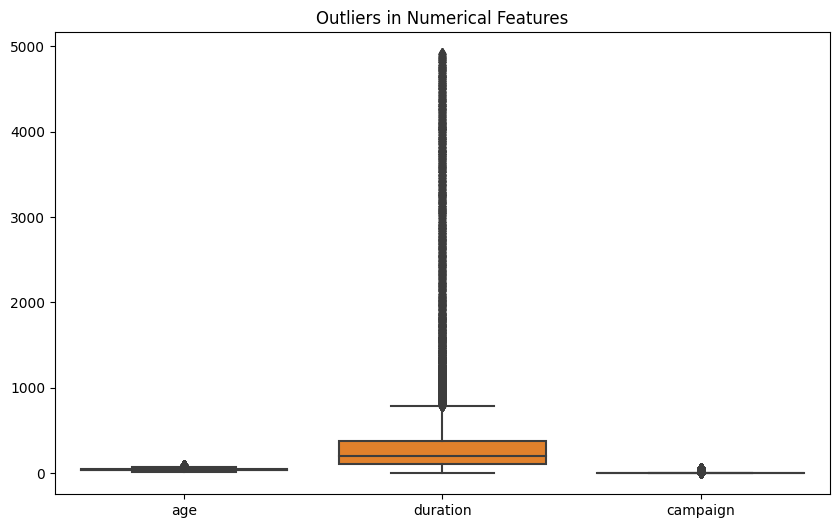

In [91]:
# Box plot to detect outliers in numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'duration', 'campaign']])  # You can add more numerical columns
plt.title('Outliers in Numerical Features')
plt.show()


**Purpose:** This boxplot helps identify any outliers in the numerical features such as age, duration, and campaign.

**Observation:** The plot reveals if there are any extreme values in these features, which could be important in understanding customer behavior. For instance, an unusually high duration might indicate an outlier or an abnormal interaction.

# Missing Data Visualization

In [68]:
# Missing data visualization
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)


Missing Data:
 last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64


**Purpose:** To check for missing values in the dataset.

**Observation:** If certain features have a high amount of missing data, it may be necessary to impute values or remove those features. You can see which columns require attention before proceeding with the modeling.


# Month Distribution (Extracted from Last Contact Date)

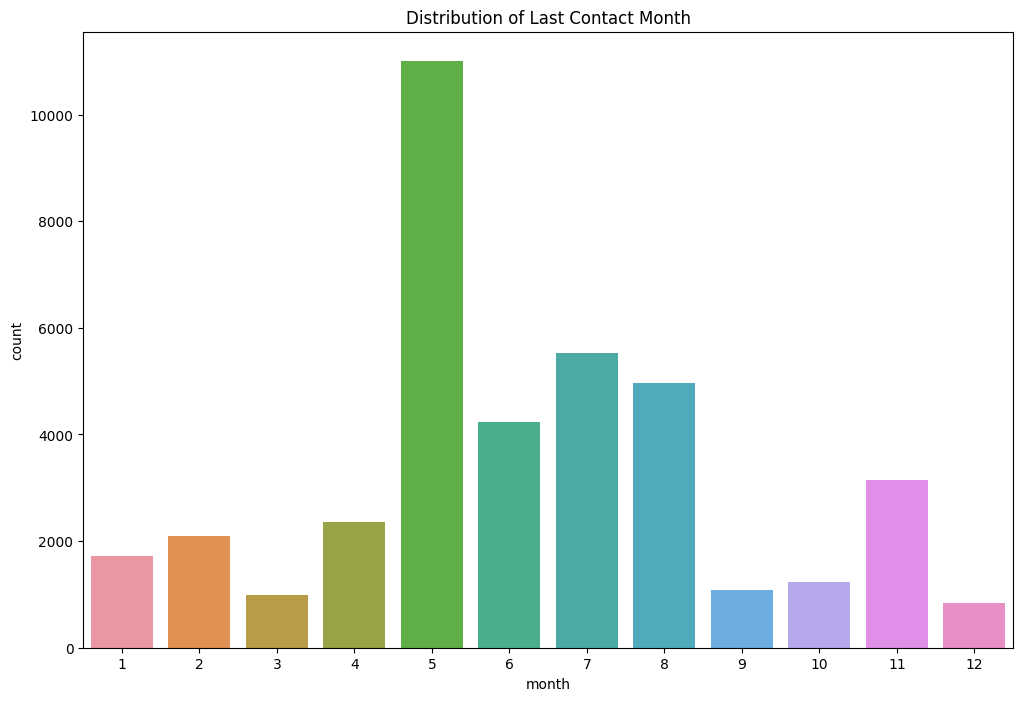

In [69]:
# Extract 'month' from 'last contact date'
df['month'] = pd.to_datetime(df['last contact date']).dt.month

# Visualize the distribution of 'month'
plt.figure(figsize=(12, 8))
sns.countplot(x='month', data=df)
plt.title('Distribution of Last Contact Month')
plt.show()


**Purpose:** This plot shows the distribution of the month in which the last contact was made for the telemarketing campaign.

**Observation:** You may see which months are more common for making contact. This could indicate seasonality in the telemarketing efforts, with certain months likely having more contacts due to campaigns or specific marketing efforts.

# Day of Week Distribution

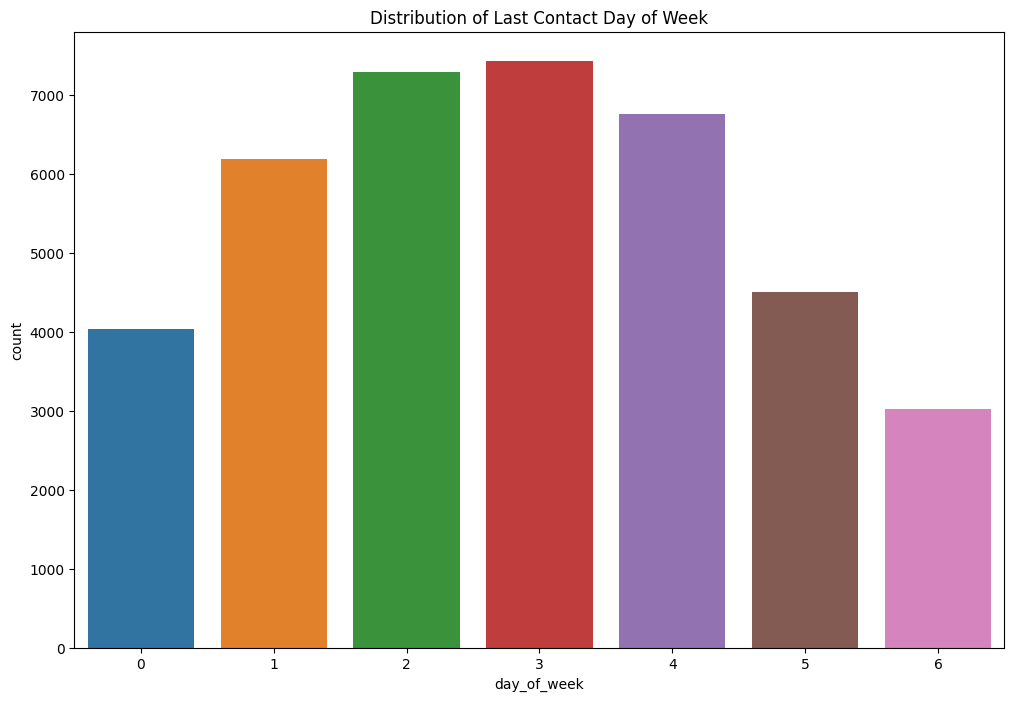

In [70]:
# Extract 'day_of_week' from 'last contact date'
df['day_of_week'] = pd.to_datetime(df['last contact date']).dt.dayofweek

# Visualize the distribution of 'day_of_week'
plt.figure(figsize=(12, 8))
sns.countplot(x='day_of_week', data=df)
plt.title('Distribution of Last Contact Day of Week')
plt.show()


**Purpose:** This plot shows which days of the week the last contacts were made.

**Observation:** If certain days (e.g., Monday or Friday) are overrepresented, it could suggest the telemarketing strategy focuses more on specific days. This might impact the effectiveness of campaigns based on the timing of the calls.

# Age and Duration by Target (Group Analysis)

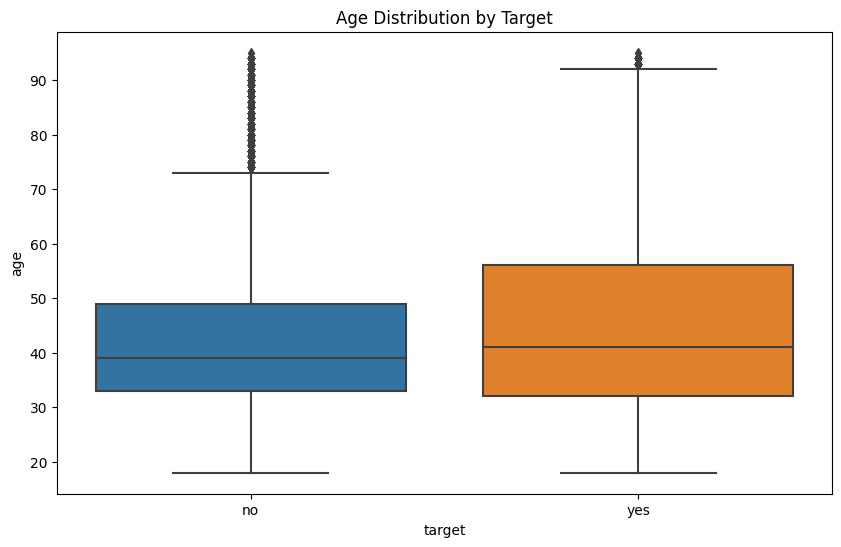

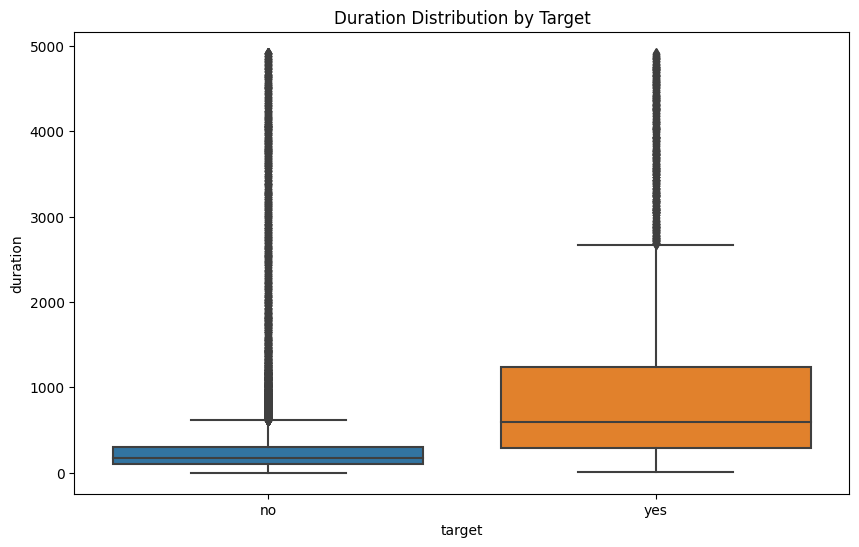

In [71]:
# Grouping age and duration by target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age Distribution by Target')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='duration', data=df)
plt.title('Duration Distribution by Target')
plt.show()


**Purpose:** To visualize how age and duration vary between those who subscribed (target=1) and those who did not (target=0).

**Observation:** Older individuals or longer durations are more common for those who subscribed. This could indicate that older customers or longer calls are more likely to result in a successful telemarketing campaign.


# Feature Engineering

In [83]:
# Extract 'year', 'month', and 'day_of_week' from 'last contact date'
# df['year'] = pd.to_datetime(df['last contact date']).dt.year
# df['month'] = pd.to_datetime(df['last contact date']).dt.month
# df['day_of_week'] = pd.to_datetime(df['last contact date']).dt.dayofweek

# Drop 'last contact date' as it's no longer needed
# df = df.drop('last contact date', axis=1)

print("\nAfter Feature Engineering (Extracting 'year', 'month', and 'day_of_week'):")
print(df.head())

# Check the shape after dropping the column
print(f"\nDataset Shape After Dropping 'last contact date': {df.shape}")


After Feature Engineering (Extracting 'year', 'month', and 'day_of_week'):
   age           job  marital  education default  balance housing loan  \
0   26   blue-collar  married  secondary      no      647     yes   no   
1   52    technician  married  secondary      no      553     yes   no   
2   44   blue-collar  married  secondary      no     1397      no   no   
3   33        admin.  married  secondary      no      394     yes   no   
4   31  entrepreneur   single   tertiary      no      137      no   no   

     contact  duration  campaign  pdays  previous poutcome  target  month  \
0   cellular       357         2    331         1    other       0      4   
1  telephone       160         1     -1         0      NaN       0     10   
2   cellular       326         1     -1         0      NaN       0     11   
3  telephone       104         3     -1         0      NaN       0      9   
4   cellular       445         2     -1         0      NaN       0      1   

   day_of_week  

# Preprocessing and Modeling Pipeline

In [86]:
# Define numerical transformer pipeline (Impute missing and scale numerical features)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values using median
    ('scaler', StandardScaler())  # Scale numerical features
])

# Define categorical transformer pipeline (Impute missing and One-hot encode categorical features)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values using most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Define the model pipeline with preprocessing and classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))  # Random Forest classifier
])

print("pipeline defined !!")

pipeline defined !!


# Hyperparameter Tuning with GridSearchCV

In [87]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model with grid search
grid_search.fit(X, y)

# Best model from grid search
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'classifier__max_depth': 30, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}


# Model Training and Evaluation

In [88]:
# Train model and evaluate performance on the training data
y_pred = best_model.predict(X)
f1 = f1_score(y, y_pred, average='macro')
print(f'F1 Score on Training Data: {f1}')


F1 Score on Training Data: 0.8834901359372584


# Test Data Preprocessing and Prediction

In [89]:
# Load the test dataset
X_test = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

# Feature engineering on the test set (same as training set)
X_test['month'] = pd.to_datetime(X_test['last contact date']).dt.month
X_test['day_of_week'] = pd.to_datetime(X_test['last contact date']).dt.dayofweek
X_test['year'] = pd.to_datetime(X_test['last contact date']).dt.year  # Extract the year
X_test = X_test.drop('last contact date', axis=1)

# Preprocessing the test data using the best model's preprocessing pipeline
X_test_preprocessed = best_model.named_steps['preprocessor'].transform(X_test)

# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Inverse transform the predicted target variable
y_test_pred = label_encoder_target.inverse_transform(y_test_pred)

# Create the submission file
submission = pd.DataFrame({"id": range(0, X_test.shape[0]), "target": y_test_pred})

# Save the submission file
submission.to_csv("submission.csv", index=False)
print("Submission file created: submission.csv")


Submission file created: submission.csv


# Confusion Matrix and Classification Report

In [92]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix and classification report
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y, y_pred, target_names=label_encoder_target.classes_)
print("Classification Report:")
print(cr)


Confusion Matrix:
[[31069  2315]
 [  313  5514]]
Classification Report:
              precision    recall  f1-score   support

          no       0.99      0.93      0.96     33384
         yes       0.70      0.95      0.81      5827

    accuracy                           0.93     39211
   macro avg       0.85      0.94      0.88     39211
weighted avg       0.95      0.93      0.94     39211



The confusion matrix represents the performance of the classification model. It shows the number of correct and incorrect predictions for each class:

**True Negatives (TN):** 31,069 — The model correctly predicted the class "no" (did not subscribe to term deposit) 31,069 times.

**False Positives (FP):** 2,315 — The model incorrectly predicted the class "yes" (subscribed) when the true label was "no" 2,315 times.

**False Negatives (FN):** 313 — The model incorrectly predicted the class "no" (did not subscribe) when the true label was "yes" 313 times.

**True Positives (TP):** 5,514 — The model correctly predicted the class "yes" (subscribed to term deposit) 5,514 times.